In [5]:
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('data/airbnb-listings.csv', sep=";", low_memory=False)

In [11]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

<Axes: >

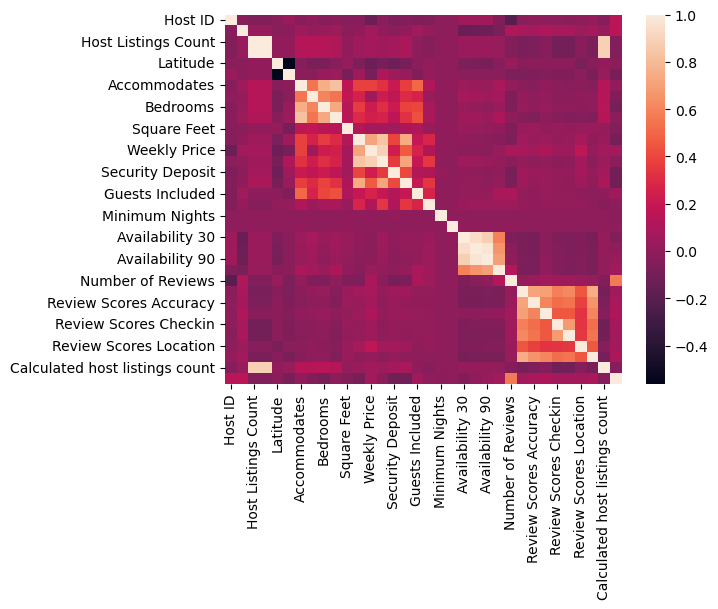

In [13]:
#Correlation Heatmap among all numerical variables
num_df = df.select_dtypes(include=['float64','int64'])
num_corr = num_df.corr()
sns.heatmap(num_corr)

In [20]:
#Correlation with Target Variable called Price
price_corr = num_df.corr()['Price'].sort_values(ascending=False)
price_corr

Price                             1.000000
Monthly Price                     0.838039
Cleaning Fee                      0.739720
Weekly Price                      0.716212
Security Deposit                  0.395048
Accommodates                      0.373973
Bedrooms                          0.364242
Beds                              0.294682
Extra People                      0.274276
Bathrooms                         0.260599
Guests Included                   0.193653
Square Feet                       0.121704
Review Scores Location            0.082470
Review Scores Rating              0.064306
Host Listings Count               0.052333
Host Total Listings Count         0.052333
Longitude                         0.049222
Review Scores Cleanliness         0.046022
Calculated host listings count    0.040973
Review Scores Accuracy            0.032642
Review Scores Communication       0.026506
Review Scores Checkin             0.022973
Host Response Rate                0.009614
Availabilit

<Axes: >

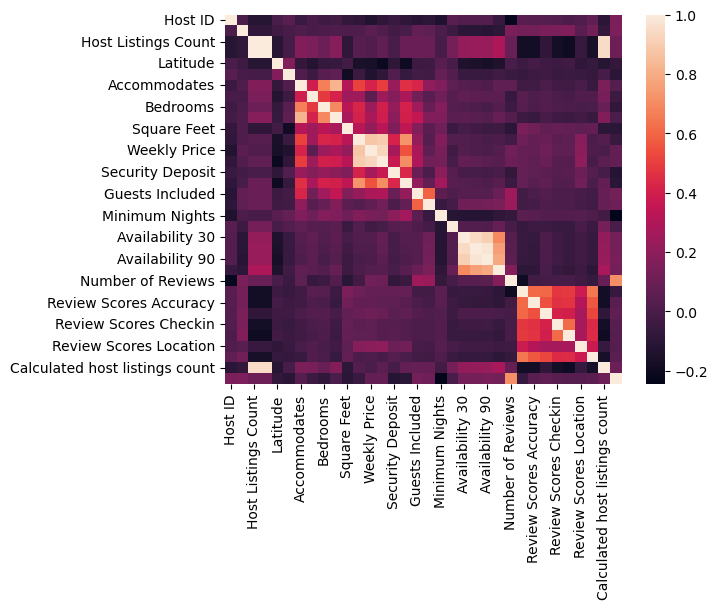

In [9]:
#Non-linear correlations with Spearman
spearman_corr = num_df.corr(method='spearman')
sns.heatmap(spearman_corr)

In [23]:
spearman_price_corr = num_df.corr(method='spearman')['Price'].sort_values(ascending=False)
spearman_price_corr

Price                             1.000000
Monthly Price                     0.896129
Weekly Price                      0.876859
Cleaning Fee                      0.726456
Accommodates                      0.509654
Bedrooms                          0.421977
Security Deposit                  0.412915
Beds                              0.407934
Square Feet                       0.323299
Bathrooms                         0.250028
Guests Included                   0.218083
Review Scores Location            0.176215
Minimum Nights                    0.160888
Review Scores Rating              0.106463
Review Scores Cleanliness         0.091129
Review Scores Accuracy            0.071018
Review Scores Communication       0.057463
Review Scores Checkin             0.051727
Host Listings Count               0.035409
Host Total Listings Count         0.035406
Extra People                      0.031193
Calculated host listings count    0.022792
Availability 30                   0.020257
Maximum Nig

# 2. Data Cleaning 

### a. Check for missing values

Missing values can significantly affect the performance of your model, so it's important to know which columns have missing data